In [1]:
# updated for the trial on
# dz 6/16/22
# 7/21/22 dz change the raw data to df
# 7/21/22 dz add psth analysis
# 8/2/22 dz changed to delta f . the method is green signal minus the mean of all ctr
# 8/6/22 read the .csv file Don't need to type in the file name
# 8/7/22 dz add 1. analyze the successful trial 2. normalization by trial, and average across trials
# 8/20/22 dz add detrend both the sig and the ctr
# 8/25/22 dz add the selection of the reward trials
# 8/30 dz modified the code to select the trial ti
# 9/12 dz change to import 'Calcium_data.npy'
# 11/11 dz create this

In [2]:
from datetime import datetime
start_time = datetime.now()

In [3]:

p_mother = 'C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/'
mouse_id = 'dz37/'
rec_d    = '20221214/'
#use_p = 'C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/' +mouse_id +'highlick'
#use_p = 'C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/' +mouse_id +'nolick'
use_p = 'C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/' +mouse_id +'pav'

print(use_p)
p = p_mother + mouse_id
fn =  mouse_id + rec_d
print(p)
import os
os.chdir(p)
import numpy as np
import pandas as pd
new_num_arr = np.load(rec_d[0:-1]+'.npy', allow_pickle=True) # load
#display(new_num_arr)
calcium_arr = new_num_arr[:,(0,1,4)]
#display(calcium_arr)
time  = new_num_arr[:,0]
sig   = new_num_arr[:,1]
pulse = new_num_arr[:,4]
df = pd.DataFrame(calcium_arr, columns = ['Time','Sig','Pulse'])
#df = pd.DataFrame(new_num_arr, columns = ['Time','Sig','Pulse'])
display(df)

C:/Users/Lab_PC1/Documents/mouse training/Deng Zhang/behavior/dz55/pav
C:/Users/Lab_PC1/Documents/fiberPhotometryData/analyzed_data_innpy/dz55/


,Time,Sig,Pulse
0,0.000000,-0.564097,224.000000
1,0.000100,-0.564097,224.000000
2,0.000200,-0.564097,224.000000
3,0.000300,-0.564413,224.000000
4,0.000400,-0.563781,224.000000
...,...,...,...
29814746,2981.499400,-0.555885,224.000000
29814747,2981.499500,-0.557464,224.000000
29814748,2981.499600,-0.558728,224.000000
29814749,2981.499700,-0.559359,224.000000


In [4]:
# change from str to int
df['Sig']   = pd.to_numeric(df['Sig'])
df['Pulse'] = pd.to_numeric(df['Pulse'])
df['Time']  = pd.to_numeric(df['Time'])
print(len(df['Pulse']))
df.head(3)
#df2.Pulse
#print(max(df2['Pulse']))
#print(min(df2['Pulse']))

29814751


,Time,Sig,Pulse
0,0.0000,-0.564097,224.0
1,0.0001,-0.564097,224.0
2,0.0002,-0.564097,224.0


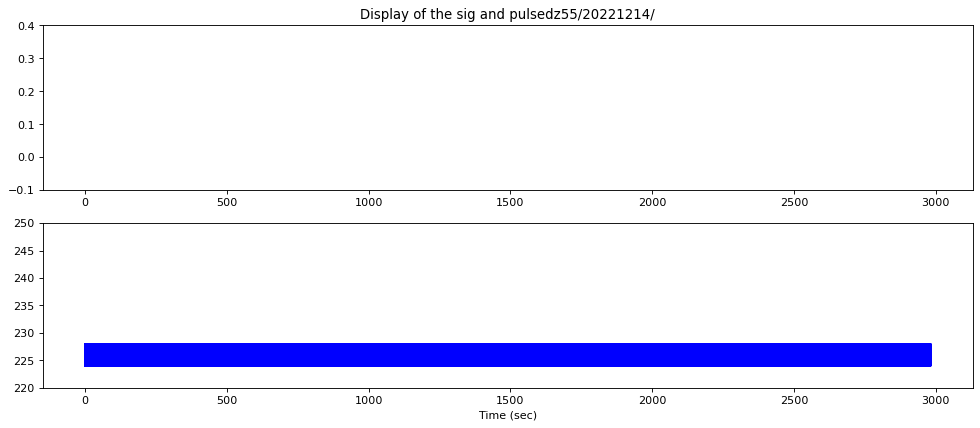

Text(0.5, 0, 'pulse value')

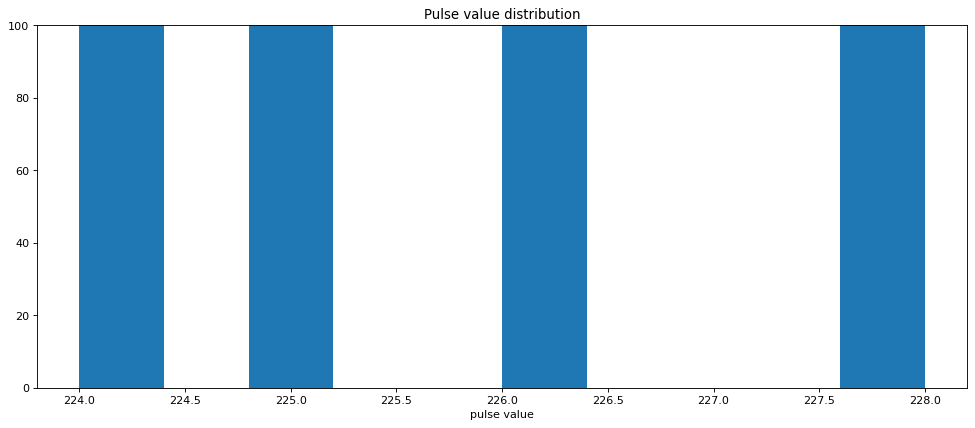

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
plt.subplot(211)
plt.plot(df['Time'],df['Sig'],'r')
#plt.xlim(0,2)
plt.ylim(-0.1,0.4)
plt.title('Display of the sig and pulse' +mouse_id+rec_d)
plt.subplot(212)
plt.xlabel('Time (sec)')

plt.plot(df['Time'],df['Pulse'],'b')
#plt.xlim(10,100)
plt.ylim(220,250)
# Display result
plt.show()

figure(figsize=(15,6), dpi=80)
plt.hist(df['Pulse'])
plt.ylim(0,100)
plt.title('Pulse value distribution')
# Give x axis label for the spike raster plot
plt.xlabel('pulse value')

In [6]:
# from the last session, we know there are three value 252 is the baseline, 253 is pulse 1 and 254 is pulse 2.
#base = -10.577928 #is the baseline
ctr_amp = 225.0 # ctrl pulse
sig_amp = 226.0 #  gcamp pulse
trial_start_amp = 230.0 #  CueOn pulse ? You must make sure this is correct

print(max(df.Pulse))
print(min(df.Pulse))

228.0
224.0


In [7]:
#ctr_df
ctr_df  = df[df.Pulse == ctr_amp]# select the rows where pul1_amp
#print(len(ctr_df))
Cal_df  = df[df.Pulse == sig_amp]# select the rows where pul2_amp
#print(len(Cal_df))
trig_df_1 = df[df.Pulse >= trial_start_amp]# select the rows where pul2_amp
print(trig_df_1)
trig_df_2 = trig_df_1[10<trig_df_1.Time]
trig_df_3 = trig_df_2[trig_df_2.Time<3000]

print(trig_df_3)

trial_dat = trig_df_3['Time']
ctr_dat   = ctr_df['Sig']
Cal_dat   = Cal_df['Sig']

ctr_ind  = list(ctr_dat.index)
Cal_ind  = list(Cal_dat.index)
t_df     = Cal_df['Time']
t_ctr_df = ctr_df['Time']
#print(len(ctr_ind))
#print(len(Cal_ind))
display(trial_dat.head(3).append(trial_dat.tail(3)))

Empty DataFrame
Columns: [Time, Sig, Pulse]
Index: []
Empty DataFrame
Columns: [Time, Sig, Pulse]
Index: []


Series([], Name: Time, dtype: float64)

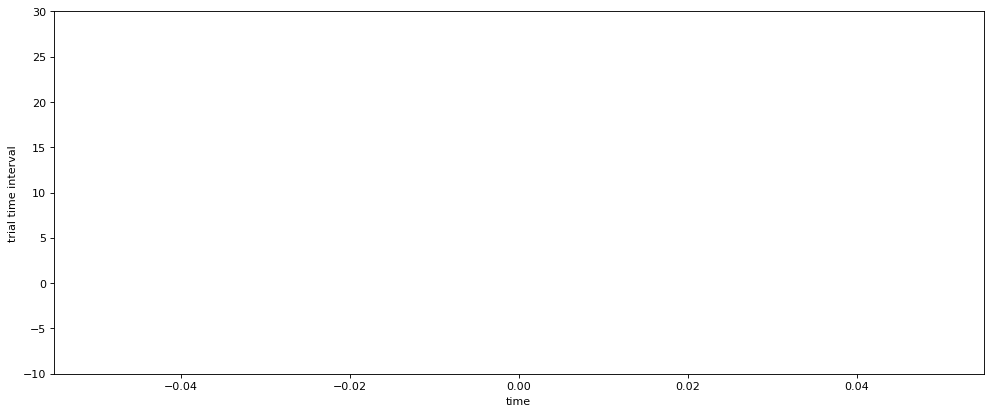

[]
[0]
Series([], Name: Time, dtype: float64)


IndexError: positional indexers are out-of-bounds

In [8]:
trial_time_arr = np.array(trial_dat)
tmp1           = np.diff(trial_time_arr)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize =(15,6), dpi=80)
plt.plot(tmp1)
#plt.xlim(0,25)
plt.ylabel('trial time interval')
plt.xlabel('time')
plt.ylim(-10,30)
plt.show()
trig_on        = np.where(tmp1>10)
cc             = np.array(trig_on)
cc2            = cc + 1
print(cc2)

trial_on_ind = np.concatenate((0,cc2),axis = None)
print(trial_on_ind)
trial_dat_reset = trial_dat.reset_index(drop = True)
print(trial_dat_reset.head(30))
trial_on_time = trial_dat_reset.iloc[trial_on_ind]
display(trial_on_time)
print(trial_dat_reset.iloc)
trial_on_time_reset = trial_on_time.reset_index(drop = True)
display(trial_on_time_reset)
np.savetxt("trial_on.csv", trial_on_time, delimiter=",")

In [ ]:
# reward time
import os
os.chdir(use_p)
entries = os.listdir()
li = []
for file in entries:
    # Check whether file is in text format or not
    #if file.endswith("use_df.csv"):
    if "use_df.csv" in file:
        if rec_d[0:-1] in file:
            use_fn = file
            print(use_fn)

In [ ]:
import pandas as pd

use_df = pd.read_csv(use_fn,sep='\s\s+', header=0,engine='python')

#display(use_df.head(5).append(use_df.tail(5)))

use_df2 = use_df[',Time Stamps,port,threshold'].str.split(',', expand=True)
use_df2.columns =['','Time','port','threshold']
use_df2 = use_df2.reset_index(drop=True)
display(use_df2.head(3).append(use_df2.tail(3)))

#use_df2.loc[use_df2['port'] == 44]
tri_df = use_df2['port']
tdf = tri_df.to_frame()
display(tdf)
use_df3 = tdf.loc[tdf['port'] == '44']
display(use_df3)
trial_num = np.arange(0,len(use_df3),1)
print(trial_num)
use_df3.insert(loc=1, column='Trial_num', value = trial_num)
#use_df3['trial_num'] = trial_num 
display(use_df3)

ID = pd.to_numeric(use_df2['port'])
port_v = ID.diff()
display(port_v)

#miss_ind = port_v.loc[port_v == 0]
#df.loc[port_v() == 0]

miss_ind = port_v[port_v == 0].index-1
print(miss_ind)

mis_df = use_df3.loc[miss_ind] 
display(use_df3.loc[miss_ind])
miss_t = mis_df['Trial_num']
print(miss_t)

miss_t_array = miss_t.to_numpy()
print(miss_t_array)

In [ ]:
import numpy as np
ctr_ind_arr = np.array(ctr_ind)
tmp1        = np.diff(ctr_ind_arr)

x1          = np.where(tmp1>1)

Cal_ind_arr = np.array(Cal_ind)

tmp2        = np.diff(Cal_ind_arr)

x2          = np.where(tmp2>1)
print(np.shape(x2))
np.shape(x2)
np.shape(x1)
print(len(t_df))

In [ ]:
ctr_dat_df = ctr_dat.iloc[x1]
#print(ctr_dat_df)
Cal_dat_df = Cal_dat.iloc[x2]
#print(Cal_dat_df)
t_ctr = t_ctr_df.iloc[x1]
t_sig = t_df.iloc[x2]
#print(t_ctr)
#print(t_sig)

In [ ]:
# reset the index for subtraction
# zd changed to ddf 8/1/2022
# zd add detrending on 8/20/2022
import statistics
pul1r = ctr_dat_df.reset_index(drop=True)
pul2r = Cal_dat_df.reset_index(drop=True)

from scipy import signal
ctr_detrended = signal.detrend(pul1r)
sig_detrended = signal.detrend(pul2r)

print(pul1r.mean())
#print(pul2r)
constant = 0.3
m_ctr = ctr_detrended.mean()+constant
print(m_ctr)
#ddf = (pul2r+constant-m_ctr)/m_ctr  # this method there will be drifting
ddf = (sig_detrended+constant-m_ctr)/m_ctr  # this method there will be drifting
#ddf = (pul2r-pul1r)/m_ctr  # this method there will be no drifting
print(ddf.mean())

In [ ]:
# 8/25 Deng added the reward trials
import os
entries = os.listdir()
li = []
for file in entries:
    # Check whether file is in text format or not
    if file.endswith("rewardDf.csv"):
        fn = file
        print(fn)
        
import pandas as pd
#fn = 'dz21_02_nolick_80max_20220805-1227rewardDf.csv'
#Reward_df = pd.read_csv(fn,sep='\s\s+', header = 0,engine='python')
#print('The reward number is : '+str(len(Reward_df)))
#Reward_df.head(5)       

#df2 = df
#Reward_df2 = Reward_df[',Time Stamps,port,threshold'].str.split(',', expand=True)
#Reward_df2.columns =['Index','Time','port','threshold']
#Reward_df2 = Reward_df2.reset_index(drop=True)
#display(Reward_df2.head(3).append(Reward_df2.tail(3)))
display(trial_on_time_reset)
#miss_t_array = miss_t_array[0:-4] only for dz14 1007
#miss_t_array = miss_t_array[0:-10] #only for dz20 1007
miss_trial = trial_on_time_reset.index.isin(miss_t_array)
#print(miss_trial)
mis_trial = trial_on_time_reset[miss_t_array]
print(mis_trial)
#print(trial_on_time_reset)
sucsessful_trial = trial_on_time_reset.drop(miss_t_array)
mis_trial = trial_on_time_reset[miss_t_array]
display(sucsessful_trial.head(15))
#display(mis_trial)

rw_time = sucsessful_trial.add(1.5)
miss_rw_time = mis_trial.add(1.5)

display(rw_time)
display(miss_rw_time)
#rw_time.head(3).append(rw_time.tail(3))

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

#plt.plot(t,diff_sig)
#plt.plot(t,df)
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,ddf)
#print(ddf)
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = lineSize[0])  
plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = lineSize[0])  
plt.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = lineSize[0])  


print(len(trial_on_time))
#plt.plot(ddf)
plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-0.05, 0.15)
#plt.xlim(0,200)
plt.ylabel('dff')

plt.show()

In [ ]:
#from scipy.stats import zscore
from scipy import stats
#import statistics as stats
#print(ddf)
#ddf_ar = ddf.to_numpy()
ddf_ar = ddf.copy()
#print(ddf_ar)
z_score_aad = stats.zscore(ddf_ar)
#print(z_score_aad)
#figure(figsize=(15,6), dpi=80)
labels = ['RawTrace','Trial on','Reward','Miss trial']
fig, axs = plt.subplots(figsize=(15,6), dpi=100)
colorCodes = np.array([[0, 0, 0],
                        [1, 0, 0],
                        [0, 1, 0]])
lineSize = [0.05, 0.02]
plt.plot(t_sig,z_score_aad)

#axs.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets = 0,linelengths = 5)  
#axs.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths =  5)  
#axs.eventplot(miss_rw_time, color = colorCodes[2,:], lineoffsets = 0,linelengths = 5)
axs.legend(labels)

plt.title('fiber responses')
# Give x axis label for the spike raster plot
plt.xlabel('Time(s)')
plt.ylim(-5, 8)
plt.xlim(0, 200)
plt.ylabel('z_score')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)
#plt.subplot(211)

plt.plot(t_sig,pul2r,'r',label = 'GCAMP')
plt.plot(t_ctr,pul1r,'b',label = 'ctr')
plt.plot(t_ctr,ctr_detrended,'g',label = 'ctr_detrend')
plt.plot(t_sig,sig_detrended,'k',label = 'sig_detrend')


#plt.ylim(0.2, 0.4)
plt.legend(loc='best')
plt.xlabel('Timepoint')
plt.ylabel('raw signal')
plt.title(use_fn[0:-10])
plt.show()

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,6), dpi=80)

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)
#plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 12.0         # seconds
n = int(T * fs) # total number of samples
t = t_ctr
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
#data = pul2r
data = z_score_aad

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

#plt.subplot(2, 1, 2)
plt.plot(t_sig,data, 'b-', label='data')
plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 5)  
plt.eventplot(rw_time, color = colorCodes[1,:], lineoffsets = 0,linelengths = 2)  


plt.plot(t_sig,y, 'g-', linewidth=2, label='filtered data')
plt.ylim(-2,5)
#plt.xlim(0,1600)

plt.xlim(400,600)
plt.ylabel('z-score')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [ ]:
# psth  people usally plot heat map. 
# dz add on 6/16/22
import seaborn as sns; sns.set_theme()
trial_num = trial_on_time.size
win = [-5,10]
samp_rate = 10000
trial_num
type(t_sig)
type(data)
# construct a dataframe

t_sig_res = t_sig.reset_index(drop=True)
t_sig_res
df_n = pd.DataFrame({'time': t_sig_res, 'data': data})
df_n

In [ ]:
# plt each trials
transient_matrix = np.zeros((len(trial_on_time),trial_num))

cue_on_time = trial_on_time+0.5# 0.5s after the trial on the cue will be on 
#time_wid = [-2:12]
print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0

print(cue_on_time[0])
for i in cue_on_time:
    winStart = i - 2 # 2s before cue
    winEnd   = i + 12  # 12s after cue
    
    #print(trial_n)
    #print(winStart)
    #print(winEnd)
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset = (trancient["time"]-i)
    ave_transient = pd.DataFrame(trancient['data']).to_numpy()
    #print(np.shape(ave_transient))
    ave_transient = transient_matrix[:,trial_n] 
    trial_n = trial_n + 1
    #print(i)
    #vv = np.concatenate((ave_transient, transient_matrix), axis=1)
    #tmp = pd.concat([trancient['data'],aa],axis = 1)
    #print(t_reset)
    plt.plot(t_reset,trancient['data'], 'b-', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    
plt.ylim(-5, 10)
#plt.legend(loc='best')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.xlabel('time(s)') 
plt.ylabel('z-score')
    #plt.title(fn[0:-4])
    #ave_transient = pd.DataFrame(trancient['data']).to_numpy()
plt.show() 

#ave_transient
#trancient['data']

In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12]
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
transient_matrix = np.ones((len(trial_on_time),len(bins_arr)-1))
#print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0
#print(trial_on_time[0])
for i in cue_on_time:
    winStart  = i + time_wid[0] # 2s before cue
    winEnd    = i + time_wid[1]  # 12s after cue
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
    #plt.eventplot(trial_on_time, color = colorCodes[0,:], lineoffsets=0,linelengths = 1)  
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'median',bins = bins_arr )
    #print(np.shape(bin_means))
    transient_matrix[trial_n,:] = bin_means
    #print(transient_matrix)
    trial_n = trial_n + 1
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
    plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
    plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

    plt.show() 


In [ ]:
bins_arr = np.arange(time_wid[0],time_wid[1]+1,bin_step)
len(bins_arr)

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(trial_on_time))
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)
print(yticklab)
print(ytick)

#sns.color_palette("coolwarm", as_cmap=True)
#cmap="YlGnBu"
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'})
ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")


cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = 800)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = 800) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title(use_fn[0:-10]+' detrend')
#plt.scalebar('zscore')

In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12] # -2 s before the reward time
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
rw_transient_mat = np.ones((len(rw_time),len(bins_arr)-1))
cue_on_time = sucsessful_trial+0.5
#print(np.shape(transient_matrix))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0

for i in cue_on_time:
    winStart  = i + time_wid[0] # 4s before reward
    winEnd    = i + time_wid[1]  # 12s after reward
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
     
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    if not trancient['data'].empty:
        bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'mean',bins = bins_arr )
    #print(np.shape(bin_means))
        rw_transient_mat[trial_n,:] = bin_means
    #print(transient_matrix)
        trial_n = trial_n + 1
        print(trial_n)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
        plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
        plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

        plt.show() 

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
#plt.subplot(2,1,1)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(trial_on_time))
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)
print(yticklab)
print(ytick)

ax = sns.heatmap( rw_transient_mat,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")

cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title('Reward trials '+use_fn[0:-10]+' detrend')
#plt.scalebar('zscore')

import statistics

figure(figsize=(12.3,4), dpi=80)
#print(rw_transient_mat)

average_trace = np.nanmean(rw_transient_mat, axis=0)
std_trace = np.nanstd(rw_transient_mat, axis=0)
print(np.shape(average_trace))
print(len(bin_edges))
plt.errorbar(bin_edges[0:-1], average_trace,std_trace,fmt ='o')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
plt.ylabel('z-score')
plt.xlabel('Time (s)')
plt.ylim(-2,2.5)
plt.xlim(-2,12)
plt.show() 


In [ ]:
# plt each trials
from scipy import stats
import matplotlib.pyplot as plt
time_wid = [-2,12] # -4 s before the reward time
bin_step = 0.05 # 0.05s
bins_arr = np.arange(time_wid[0],time_wid[1],bin_step)
miss_rw_transient_mat = np.ones((len(miss_rw_time),len(bins_arr)-1))
print(np.shape(miss_rw_transient_mat))
#transient_matrix = []
figure(figsize=(15,6), dpi=80)
aa = [];
trial_n = 0
cue_on_time = mis_trial+0.5 # 0.5s afer 
for i in cue_on_time:
    winStart  = i + time_wid[0] # 4s before reward
    winEnd    = i + time_wid[1]  # 12s after reward
    
    trancient = df_n.loc[(df_n["time"] > winStart) & (df_n["time"] <  winEnd)]
    #print(trancient)
    t_reset   = (trancient["time"]-i)

    figure(figsize=(15,1), dpi=80)
    #plt.subplot(399, 1,i)
    plt.plot(t_reset,trancient['data'], 'b.', label='data')
     
    #plt.ylim(-0.015, 0.015)
    plt.xlim(-2, 12)
    if not trancient['data'].empty:
        bin_means, bin_edges, binnumber = stats.binned_statistic(t_reset,
                trancient['data'], statistic = 'mean',bins = bins_arr )
    #print(np.shape(bin_means))
        miss_rw_transient_mat[trial_n,:] = bin_means
    #print(transient_matrix)
        trial_n = trial_n + 1
        print(trial_n)
        plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors = 'g', lw = 5,
           label = 'binned statistic of data')
    #plt.legend()
    #plt.legend(loc='best')
        plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  
        plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 5)  

        plt.show() 

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
figure(figsize=(15,10), dpi=100)
tickstep = 1# step = 1s
bin_step = 0.05 # 0.05s
xticklab = np.arange(time_wid[0],time_wid[1]+1,tickstep)
#print(xticklab)
xtick = np.arange(0,(time_wid[1]-time_wid[0])/bin_step+1,tickstep/bin_step)
xtick_int = xtick.astype(int)
#print(xtick_int)
ytick_step = 20
print(len(rw_time))
#ytick =  np.arange(0,len(miss_rw_time)+1,ytick_step)
#yticklab =  np.arange(1,len(miss_rw_time)+2,ytick_step)
ytick =  np.arange(0,len(trial_on_time)+1,ytick_step)
yticklab =  np.arange(1,len(trial_on_time)+2,ytick_step)

print(yticklab)
print(np.max(ytick))

#sns.color_palette("coolwarm", as_cmap=True)
#cmap="YlGnBu"
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'})
print(np.shape(miss_rw_transient_mat))
ax = sns.heatmap( miss_rw_transient_mat,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="jet")
#ax = sns.heatmap( transient_matrix,vmin=-2, vmax=6,cbar_kws={'label': 'z-score'},cmap="YlGnBu")

#ax = sns.heatmap( transient_matrix,cbar_kws={'label': 'z-score'})
# cueon  0s
# cueoff 1.5s

cueon_bin = abs(time_wid[0])/bin_step
plt.xticks(xtick_int,labels =  xticklab)
plt.yticks(ytick,labels =  yticklab)
plt.xticks(rotation=0)
print(cueon_bin)
cueoff_bin = (abs(time_wid[0])+1.5)/bin_step
plt.eventplot([cueoff_bin], color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2)  
plt.eventplot([cueon_bin],  color = colorCodes[0,:], lineoffsets=0,linelengths = np.max(ytick)*2) 
plt.ylabel('Trials')
plt.xlabel('Time (s)')
plt.title('No reward'+ use_fn[0:-10]+' detrend'+'correct trial')
#plt.scalebar('zscore)

figure(figsize=(12.5,4), dpi=80)
average_trace = np.nanmean(miss_rw_transient_mat, axis=0)
std_trace = np.nanstd(miss_rw_transient_mat, axis=0)
print(np.shape(average_trace))
print(len(bin_edges))
plt.errorbar(bin_edges[0:-1], average_trace,std_trace,fmt ='o')
plt.eventplot([1.5], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.eventplot([0], color = colorCodes[1,:], lineoffsets=0,linelengths = 10)  
plt.ylabel('z-score')
plt.xlabel('Time (s)')
plt.ylim(-2,3.5)
plt.xlim(-2,12)
plt.show()


In [ ]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)